**Praca domowa 1 Marcin Wilk**

Najpierw wczytujemy pakiety, z których będziemy korzystać

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
import calendar

In [2]:
df = pd.read_csv("C:\\Users\\Lenovo\\Desktop\\Wstęp do uczenia maszynowego\\Dane\\forest_fires_dataset.csv")

Popatrzymy sobie pobieżnie na naszą ramkę danych przy pomocy metod head(), info() czy describe()

In [3]:
df.head()

X  Y month  day  FFMC   DMC     DC  ISI  temp    RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51.0   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33.0   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33.0   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97.0   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99.0   1.8   0.0   0.0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    float64
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(9), int64(2), object(2)
memory usage: 52.6+ KB


Pierwsze co rzuca nam się w oczy to duża liczba zmiennych numerycznych w danych oraz brak wartości null. Jedynie miesiąc i dzień tygodnia są zmiennymi kategorycznymi. Naszą pierwszą intuicją będzie jednak to, że nazwa dnia tygodnia nie powinna mieć wpływu na zmienną objaśnianą jaką jest powierzchnia spalonego lasu (**area**), gdyż jest to tylko nazwa dnia, nic nam nie mówi to o dokładnej dacie zdarzenia. Będzie to jednak wymagało dokładniejszego sprawdzenia. Miesiące możemy bardzo łatwo zamienić na odpowiadające im numery, pamiętając, że dalej będzie to zmienna kategoryczna. **X** i **Y** również niejako wskazują nam kategorię do jakiej należy dana obserwacja, wskazują nam obszar w jakim zaobserwowano pozostałe zmienne.

In [4]:
df.describe()

X           Y        FFMC         DMC          DC         ISI  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     4.669246    4.299807   90.644681  110.872340  547.940039    9.021663   
std      2.313778    1.229900    5.520111   64.046482  248.066192    4.559477   
min      1.000000    2.000000   18.700000    1.100000    7.900000    0.000000   
25%      3.000000    4.000000   90.200000   68.600000  437.700000    6.500000   
50%      4.000000    4.000000   91.600000  108.300000  664.200000    8.400000   
75%      7.000000    5.000000   92.900000  142.400000  713.900000   10.800000   
max      9.000000    9.000000   96.200000  291.300000  860.600000   56.100000   

             temp          RH        wind        rain         area  
count  517.000000  517.000000  517.000000  517.000000   517.000000  
mean    18.889168   44.288201    4.017602    0.021663    12.847292  
std      5.806625   16.317469    1.791653    0.295959    63.655818  
min      2.200000   15.000000    0.400000    0.000000     0.000000  
25%     15.500000   33.000000    2.700000    0.000000     0.000000  
50%     19.300000   42.000000    4.000000    0.000000     0.520000  
75%     22.800000   53.000000    4.900000    0.000000     6.570000  
max     33.300000  100.000000    9.400000    6.400000  1090.840000

Wnioski jakie możemy wyciągnąć na podstawie describe odnośnie niektórych ze zmiennych:
+ **FFMC** jest bardzo mocno skupiona w okół swojej średniej/mediany, jednak możliwe obserwacje odstające z dołu
+ **DC** stosunkowo duże wartości w porównaniu do innych zmiennych, możliwe, że trzeba będzie zastanowić się nad jakąś normalizacją
+ **rain** występują tu prawie same zera, trzeba będzie uważnie patrzeć na tę zmienną
+ **area** zmienna objaśniana również ma bardzo dużo obserwacji zerowych, jednak nie tyle co **rain**, przede wszystkim wyróżnia się bardzo duża wartość maksymalna w stosunku nawet do kwantyla 75%

Popatrzmy teraz na wykres histogramowy zmiennej **area** oraz ile jest w niej wartości zerowych

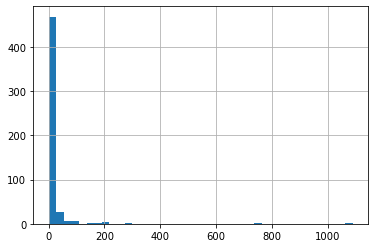

In [8]:
df['area'].hist(bins=40)

In [11]:
sum(df['area']==0) #tyle dokładnie spośród 517 obserwacji jest zerowych

247

Zobaczmy jak bedzie wyglądał histogram bez wartości zerowych

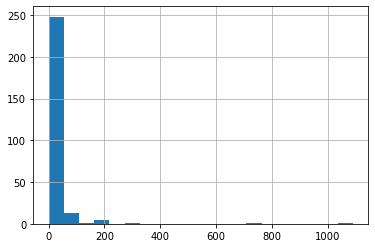

In [13]:
df['area'].loc[df['area']!=0].hist(bins=20)

Oba te wykresy wyglądają bardzo podobnie, rozkład tej zmiennej jest mocno skośny prawostronnie. Spróbujmy zatem przekształcić ją jakoś.

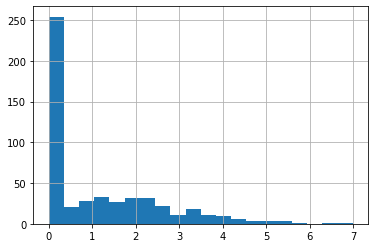

In [16]:
np.log(df['area']+1).hist(bins=20)

Dzięki temu przekształceniu rozkład zmiennej **area** nie jest już tak prawostronnie skośny, jednak dalej zdecydowanie dominuje w nim wartość zerowa. Jest to jednak nieuniknione z powodu bardzo dużej liczby wartości zerowych w wyjściowych danych. Zostaniemy jednak przy tym przekształceniu, gdyż dzięki niemu więcej widać na histogramie tej zmiennej.

In [3]:
df['area'] = np.log(df['area']+1)

Popatrzmy teraz na histogramy zmiennej **area** w zależności od dnia tygodnia

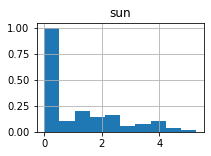

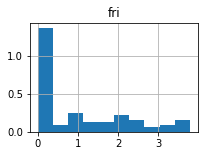

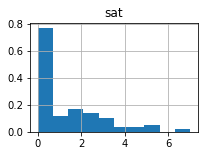

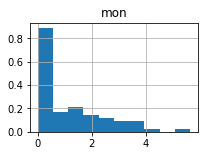

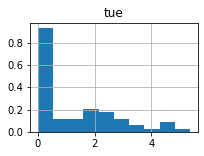

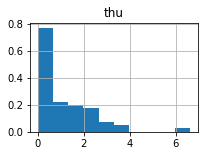

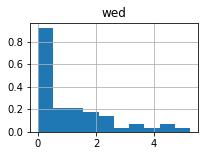

In [4]:
days = df['day'].value_counts().index.tolist()
for d in days:
    df['area'].loc[df['day']==d].hist(bins=10,density=True,figsize=(3,2))
    plt.title(d)
    plt.show()

Możemy zaobserwować, że rozkłady nowej zmiennej **area** nie różnią się zbytnio pod względem dni tygodnia, co zgadza się z naszą intuicją. Możemy zatem przyjąć, że ta cecha jest nieistotna i usunąć ją z naszego zbioru danych.

In [5]:
df=df.drop(columns=['day'])

In [6]:
df['month'] = df['month'].apply(lambda m:list(calendar.month_abbr).index(m.capitalize())) #zamieniamy miesiące na numery

Popatrzmy teraz na histogramy pozostałych zmiennych numerycznych

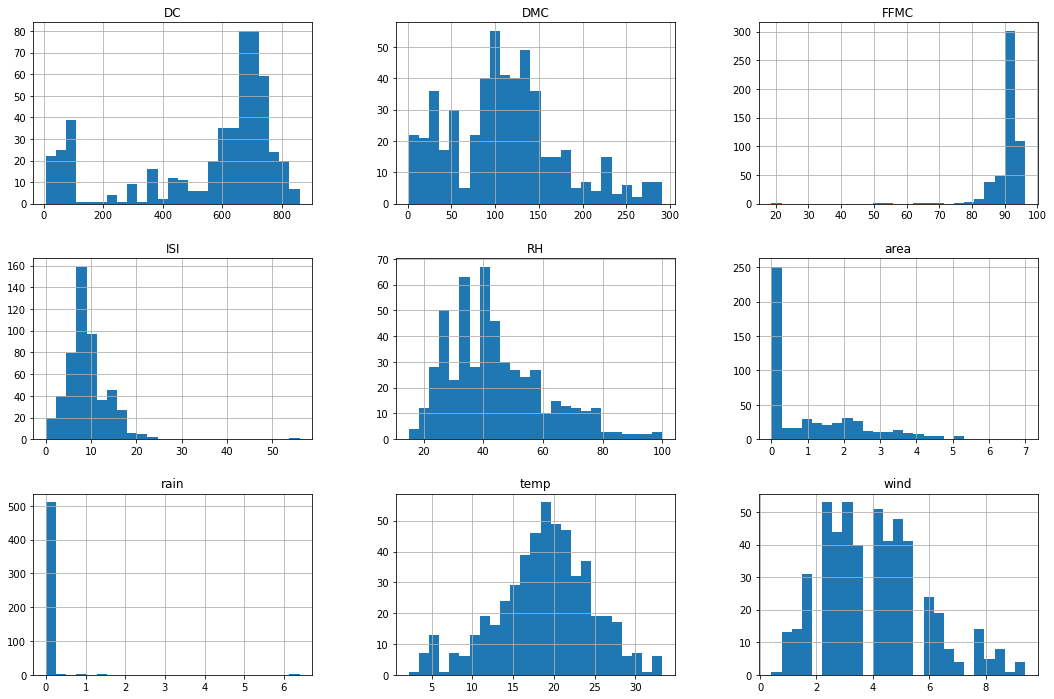

In [56]:
df.iloc[:,3:].hist(figsize=(18, 12), bins=25)
plt.show()

In [54]:
sum(df['rain']==0)

509

Zmienna **rain** ma prawie same wartości zerowe, zatem wnioskujemy, że będzie wnosiła bardzo niewiele do modelu i możemy się jej pozbyć.

In [7]:
df=df.drop(columns=['rain'])

**ISI**, **temp** oraz **wind** mają rozkłady przypominające rozkład normalny, więc moglibyśmy je wystandaryzować, jednak nie jest to konieczne, zwłaszcza dla temperatury i wiatru, gdyż dla nich mamy naturalną interpretowalność. Zmienna **ISI** może jednak posiadać obserwacje odstające, które możemy wychwycić za pomocą standaryzacji.

In [8]:
ISI_mean=np.mean(df['ISI'])
ISI_std=np.std(df['ISI'])
df['ISI']=(df['ISI']-ISI_mean)/ISI_std
np.where(np.abs(df['ISI'])>3)

(array([ 22, 266], dtype=int64),)

In [8]:
print(df['ISI'][22])
print(df['ISI'][266])

10.335380836156064
3.002884720682217


Znaleźliśmy 2 obserwacje, które możemy uznać za odstające, możemy później usunąć je z naszego zbioru danych.

Kolejną zmienną dla której możemy spróbować znaleźć przekształcenie jest **FFMC** gdyż ma ona ewidentnie rozkład lewostronnie skośny.

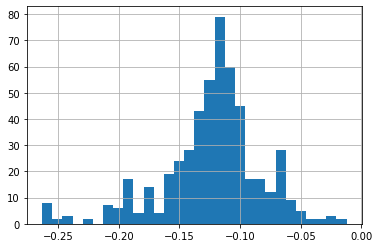

In [85]:
param=100
((df['FFMC']-param)**(-1)).hist(bins=30)
plt.show()

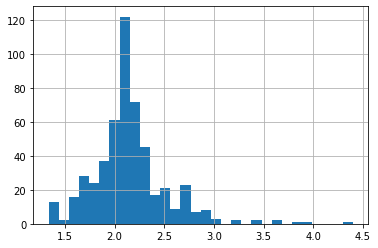

In [86]:
param=100
np.log(-df['FFMC']+param).hist(bins=30)
plt.show()

Znaleźliśmy co prawda 2 jednoznaczne przekształcenia zmiennej **FFMC**, po których nowa cecha ma w przybliżeniu rozkład normalny z pewnymi obserwacjami odstającymi, jednak funkcje te zależą od pewnych parametrów wybranych na podstawie zbioru treningowego, co oznacza, że na innych danych przekształcenia te mogłyby zupelnie nie zadziałać. 

Pozostałe wnioski odnośnie reszty danych są takie, że **DMC** i **RH** są lekko prawostronnie skośne w porównaniu do rozkładu normalnego, lecz nie ma znaczącej potrzeby by jakoś przekształcać te zmienne. Problematyczną cechą pozostaje **DC**, które wygląda na rozkład dwumodalny, w dodatku o dużych liczbach, stąd ciężko znaleźć odpowiednie przekształcenie tej zmiennej jak również nie powinniśmy jej standaryzować.

Kolejnymi zmiennymi na które warto zwrócić uwagę są zmienne pozycyjne **X** i **Y**. Moglibyśmy je przesunąć tak aby obie zaczynały się od zera, tak by można było łatwo np. indeksować macierze tymi zmiennymi.

In [9]:
df['X']=df['X']-np.min(df['X'])
df['Y']=df['Y']-np.min(df['Y'])

Możemy dzięki temu przetestować zmienność **area** w zależności od pozycji.

In [10]:
def to_matrix(Z):
    M = np.zeros((8,9))
    for x,y in Z.index:
        M[y,x]=Z[x,y]
    return M

In [11]:
%matplotlib notebook 

<IPython.core.display.Javascript object>


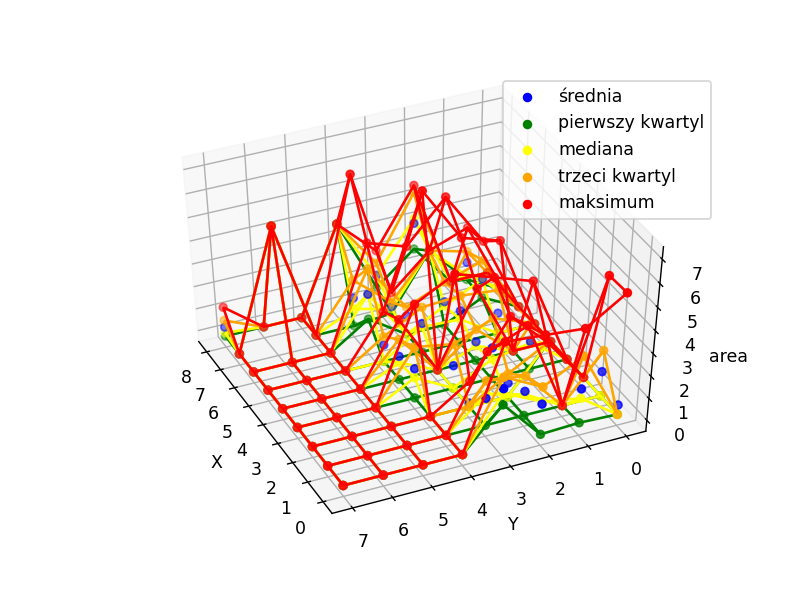

In [12]:
fig = plt.figure()
ax = plt.axes(projection="3d")
X, Y = np.meshgrid( np.linspace(0,8,9),np.linspace(0,7,8))
means = to_matrix(df.groupby(['X','Y'])['area'].agg(lambda x:np.mean(x)))
ax.scatter(X,Y,means,color='blue',label='średnia')
Q1 = to_matrix(df.groupby(['X','Y'])['area'].agg(lambda x:np.quantile(x,0.25)))
ax.scatter(X, Y, Q1, color='green',label='pierwszy kwartyl')
med = to_matrix(df.groupby(['X','Y'])['area'].agg(lambda x:np.quantile(x,0.5)))
ax.scatter(X, Y, med, color='yellow',label='mediana')
Q3 = to_matrix(df.groupby(['X','Y'])['area'].agg(lambda x:np.quantile(x,0.75)))
ax.scatter(X, Y, Q3, color='orange',label='trzeci kwartyl')
maxx = to_matrix(df.groupby(['X','Y'])['area'].agg(lambda x:np.max(x,)))
ax.scatter(X, Y, maxx, color='red',label='maksimum')
ax.plot_wireframe(X, Y, Q1, color='green')
ax.plot_wireframe(X, Y, med, color='yellow')
ax.plot_wireframe(X, Y, Q3, color='orange')
ax.plot_wireframe(X, Y, maxx, color='red')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('area')
ax.legend()
plt.show()

Z wykresu tego możemy wyczytać, że największe pożary działy się dla **Y** z przedziału 1-4, dla pozycji **X** można zaobserwować delikatną tendencję rosnącą w kierunku większych współrzędnych

Sprawdźmy dalej jak wyglądają pairploty dla zmiennych objaśniających oraz **area**.

<IPython.core.display.Javascript object>


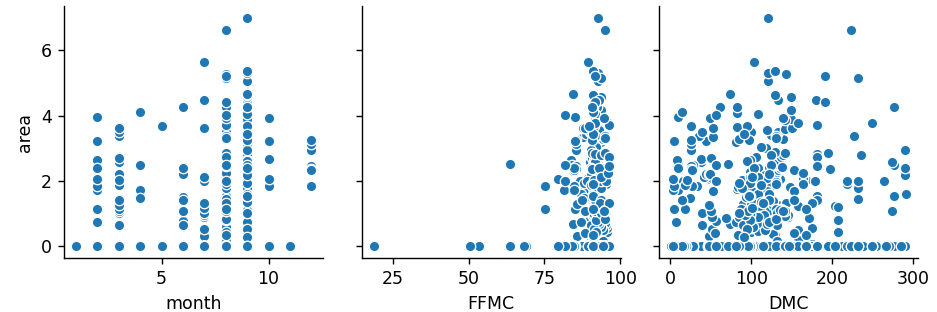

<IPython.core.display.Javascript object>


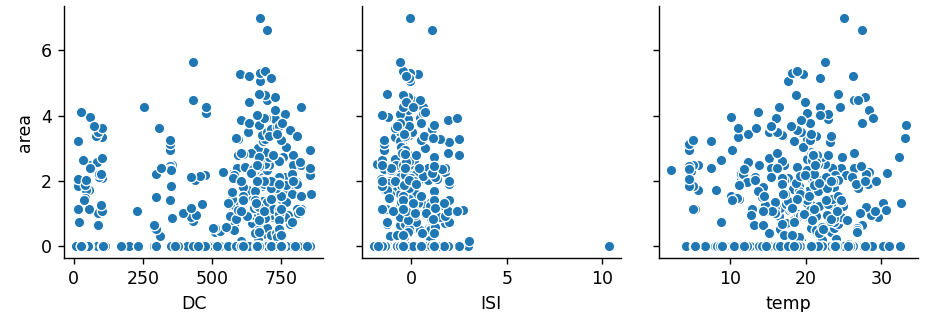

<IPython.core.display.Javascript object>


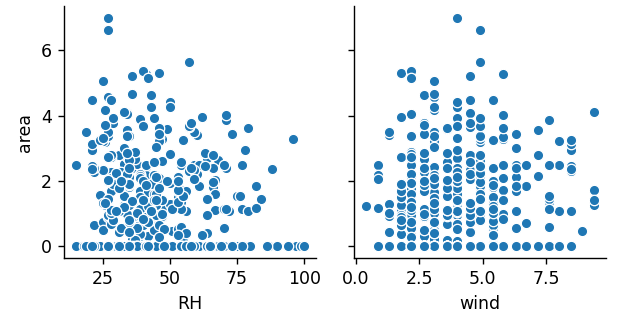

In [73]:
sns.pairplot(df, y_vars="area", x_vars=df.columns.values[2:5])  # EDIT by Amit 
sns.pairplot(df, y_vars="area", x_vars=df.columns.values[5:8])
sns.pairplot(df, y_vars="area", x_vars=df.columns.values[8:10])

plt.show()

Z wykresów tych ciężko dostrzec wyraźne zależności pomiędzy zmiennymi objaśniającymi a zmienną objaśnianą. Możemy jedynie zaobserwować delikatną dodatnią zależność między **area** a **temp** i **FFMC**. Z kolei małą zależność przeciwną możemy dostrzec dla zmiennej **RH**. Istotną informacją wydaje się jednak to, że widzimy duże zagęszczenie niezerowych wartości area dla 8 i 9 miesiąca czyli sierpnia i września.

Na koniec przyjrzymy się korelacjom poszczególnych zmiennych

In [13]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

Z tego wykresu możemy wywnioskować, że **DC** jest silnie skorelowana z **month**, **DMC** oraz **temp** co może wskazywać na to, że zmienna ta będzie kombinacją liniową powyższej trójki, więc będziemy mogli usunąć ją z modelu. Niestety zmienna objaśniana jest bardzo słabo skorelowana z każdą z pozostałych zmiennych, więc model liniowy nie będzie tu raczej adekwatny.